# **Linear Regression from Scratch**

### **Introduction**

Linear regression is a **statistical model** used to verify the **relationship** between two or more variables. The goal of this model is to try to **predict the value of the dependent variable** based on one or more independent variables. To achieve this, the aim is to find a **line** that **minimizes the difference** between the **observed** values and the **predicted** values.

The **equation of a straight line** is given by the following formula:


$$y = ax + b$$

To find the equation of the line that will satisfy the model's objective, it is necessary to find the coefficients $a$ and $b$, called the **slope coefficient** and **intercept coefficient**, respectively. Using the **least squares method**, the following formulas are obtained:

$$a = \frac{\sum [(x_i - \overline x)(y_i - \overline y)]}{\sum(x_i - \overline x)^2}$$
$$b = \overline y - a\overline x$$

To assess the **quality** of a regression model, two indicators are used: **MSE** (mean squared error) and $R^2$ (coefficient of determination). The formula for both is given as follows:

$$\mathrm{MSE} = \frac{1}{n}\sum_{i = 1}^n(y_i - \hat y_i)^2$$
$$R^2 = 1 - \frac{\sum_{i = 1}^n (y_i - \hat y_i)^2}{\sum_{i = 1}^n (y_i - \overline y)^2}$$

### **Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

### **Reading and Cleaning the Data**

Initially, we open the file `data.csv` located in the `input` folder using the `NumPy` library, remove the header, and set the type to `float64`.

In [2]:
PATH = Path('input') / 'data.csv'

data = np.genfromtxt(PATH, dtype='float64', delimiter=',', skip_header=1)

print(data)

[[ 0.00000000e+00  1.99014246e+01]
 [ 3.34448161e-01  1.68819137e+00]
 [ 6.68896321e-01  2.61028969e+01]
 [ 1.00334448e+00  5.31992569e+01]
 [ 1.33779264e+00  1.31988036e+00]
 [ 1.67224080e+00  2.15649330e+00]
 [ 2.00668896e+00  5.73931069e+01]
 [ 2.34113712e+00  3.38758847e+01]
 [ 2.67558528e+00 -2.39526837e+00]
 [ 3.01003344e+00  2.88018849e+01]
 [ 3.34448161e+00 -5.41326771e-01]
 [ 3.67892977e+00  2.25431808e-01]
 [ 4.01337793e+00  2.22923130e+01]
 [ 4.34782609e+00 -4.15288421e+01]
 [ 4.68227425e+00 -3.50418494e+01]
 [ 5.01672241e+00  6.73180143e-01]
 [ 5.35117057e+00 -1.20070072e+01]
 [ 5.68561873e+00  2.86414668e+01]
 [ 6.02006689e+00 -7.19055504e+00]
 [ 6.35451505e+00 -2.14828234e+01]
 [ 6.68896321e+00  6.56918711e+01]
 [ 7.02341137e+00             nan]
 [ 7.35785953e+00  2.54204950e+01]
 [ 7.69230769e+00 -1.85116764e+01]
 [ 8.02675585e+00  8.73540790e+00]
 [ 8.36120401e+00  2.92306877e+01]
 [ 8.69565217e+00 -7.79067689e+00]
 [ 9.03010033e+00  3.88461914e+01]
 [ 9.36454849e+00  1

To handle **missing** values, we will **remove** them.

In [3]:
mask = ~np.isnan(data).any(axis=1)
data = data[mask]

print(data)

[[ 0.00000000e+00  1.99014246e+01]
 [ 3.34448161e-01  1.68819137e+00]
 [ 6.68896321e-01  2.61028969e+01]
 [ 1.00334448e+00  5.31992569e+01]
 [ 1.33779264e+00  1.31988036e+00]
 [ 1.67224080e+00  2.15649330e+00]
 [ 2.00668896e+00  5.73931069e+01]
 [ 2.34113712e+00  3.38758847e+01]
 [ 2.67558528e+00 -2.39526837e+00]
 [ 3.01003344e+00  2.88018849e+01]
 [ 3.34448161e+00 -5.41326771e-01]
 [ 3.67892977e+00  2.25431808e-01]
 [ 4.01337793e+00  2.22923130e+01]
 [ 4.34782609e+00 -4.15288421e+01]
 [ 4.68227425e+00 -3.50418494e+01]
 [ 5.01672241e+00  6.73180143e-01]
 [ 5.35117057e+00 -1.20070072e+01]
 [ 5.68561873e+00  2.86414668e+01]
 [ 6.02006689e+00 -7.19055504e+00]
 [ 6.35451505e+00 -2.14828234e+01]
 [ 6.68896321e+00  6.56918711e+01]
 [ 7.35785953e+00  2.54204950e+01]
 [ 7.69230769e+00 -1.85116764e+01]
 [ 8.02675585e+00  8.73540790e+00]
 [ 8.36120401e+00  2.92306877e+01]
 [ 8.69565217e+00 -7.79067689e+00]
 [ 9.03010033e+00  3.88461914e+01]
 [ 9.36454849e+00  1.03922105e+01]
 [ 9.69899666e+00  2

To handle **duplicate** values, we will also **remove** them.

In [4]:
data = np.unique(data, axis=0)

print(data)

[[ 0.00000000e+00  1.99014246e+01]
 [ 3.34448161e-01  1.68819137e+00]
 [ 6.68896321e-01  2.61028969e+01]
 [ 1.00334448e+00  5.31992569e+01]
 [ 1.33779264e+00  1.31988036e+00]
 [ 1.67224080e+00  2.15649330e+00]
 [ 2.00668896e+00  5.73931069e+01]
 [ 2.34113712e+00  3.38758847e+01]
 [ 2.67558528e+00 -2.39526837e+00]
 [ 3.01003344e+00  2.88018849e+01]
 [ 3.34448161e+00 -5.41326771e-01]
 [ 3.67892977e+00  2.25431808e-01]
 [ 4.01337793e+00  2.22923130e+01]
 [ 4.34782609e+00 -4.15288421e+01]
 [ 4.68227425e+00 -3.50418494e+01]
 [ 5.01672241e+00  6.73180143e-01]
 [ 5.35117057e+00 -1.20070072e+01]
 [ 5.68561873e+00  2.86414668e+01]
 [ 6.02006689e+00 -7.19055504e+00]
 [ 6.35451505e+00 -2.14828234e+01]
 [ 6.68896321e+00  6.56918711e+01]
 [ 7.35785953e+00  2.54204950e+01]
 [ 7.69230769e+00 -1.85116764e+01]
 [ 8.02675585e+00  8.73540790e+00]
 [ 8.36120401e+00  2.92306877e+01]
 [ 8.69565217e+00 -7.79067689e+00]
 [ 9.03010033e+00  3.88461914e+01]
 [ 9.36454849e+00  1.03922105e+01]
 [ 9.69899666e+00  2

To handle **outliers**, we will remove them using the **interquartile range**.

In [5]:
p25 = np.percentile(data, 25, axis=0)
p75 = np.percentile(data, 75, axis=0)
iqr = p75 - p25

lower_limit = p25 - 1.5 * iqr
upper_limit = p75 + 1.5 * iqr

mask = (data >= lower_limit) & (data <= upper_limit)
mask = np.all(mask, axis=1)

data = data[mask]

print(data)

[[ 0.00000000e+00  1.99014246e+01]
 [ 3.34448161e-01  1.68819137e+00]
 [ 6.68896321e-01  2.61028969e+01]
 [ 1.00334448e+00  5.31992569e+01]
 [ 1.33779264e+00  1.31988036e+00]
 [ 1.67224080e+00  2.15649330e+00]
 [ 2.00668896e+00  5.73931069e+01]
 [ 2.34113712e+00  3.38758847e+01]
 [ 2.67558528e+00 -2.39526837e+00]
 [ 3.01003344e+00  2.88018849e+01]
 [ 3.34448161e+00 -5.41326771e-01]
 [ 3.67892977e+00  2.25431808e-01]
 [ 4.01337793e+00  2.22923130e+01]
 [ 4.34782609e+00 -4.15288421e+01]
 [ 4.68227425e+00 -3.50418494e+01]
 [ 5.01672241e+00  6.73180143e-01]
 [ 5.35117057e+00 -1.20070072e+01]
 [ 5.68561873e+00  2.86414668e+01]
 [ 6.02006689e+00 -7.19055504e+00]
 [ 6.35451505e+00 -2.14828234e+01]
 [ 6.68896321e+00  6.56918711e+01]
 [ 7.35785953e+00  2.54204950e+01]
 [ 7.69230769e+00 -1.85116764e+01]
 [ 8.02675585e+00  8.73540790e+00]
 [ 8.36120401e+00  2.92306877e+01]
 [ 8.69565217e+00 -7.79067689e+00]
 [ 9.03010033e+00  3.88461914e+01]
 [ 9.36454849e+00  1.03922105e+01]
 [ 9.69899666e+00  2

Then, from the processed data, we will extract the values for the `x` and `y` axes.

In [6]:
x = data[:, 0]
y = data[:, 1]

print(x, '\n')
print(y)

[  0.           0.33444816   0.66889632   1.00334448   1.33779264
   1.6722408    2.00668896   2.34113712   2.67558528   3.01003344
   3.34448161   3.67892977   4.01337793   4.34782609   4.68227425
   5.01672241   5.35117057   5.68561873   6.02006689   6.35451505
   6.68896321   7.35785953   7.69230769   8.02675585   8.36120401
   8.69565217   9.03010033   9.36454849   9.69899666  10.03344482
  10.36789298  10.70234114  11.0367893   11.37123746  11.70568562
  12.04013378  12.37458194  12.7090301   13.04347826  13.37792642
  13.71237458  14.04682274  14.3812709   14.71571906  15.05016722
  15.38461538  15.71906355  16.05351171  16.38795987  16.72240803
  17.05685619  17.39130435  17.72575251  18.06020067  18.39464883
  18.72909699  19.06354515  19.39799331  19.73244147  20.06688963
  20.40133779  20.73578595  21.07023411  21.40468227  21.73913043
  22.0735786   22.40802676  22.74247492  23.07692308  23.41137124
  23.7458194   24.08026756  24.41471572  24.74916388  25.08361204
  25.41806

### **Linear Regression Calculation**

First, we will calculate the **mean** of the values for the `x` and `y` axes.

In [7]:
x_mean = x.mean()
y_mean = y.mean()

print(f'X Axis Mean: {x_mean}')
print(f'Y Axis Mean: {y_mean}')

X Axis Mean: 49.56983046938069
Y Axis Mean: 131.7409368920736


Next, we will calculate the **difference** between each value of the `x` and `y` axes and their respective **means**.

In [8]:
x_diff_mean = x - x_mean
y_diff_mean = y - y_mean

print(x_diff_mean, '\n')
print(y_diff_mean, '\n')

[-49.56983047 -49.23538231 -48.90093415 -48.56648599 -48.23203783
 -47.89758967 -47.56314151 -47.22869335 -46.89424519 -46.55979702
 -46.22534886 -45.8909007  -45.55645254 -45.22200438 -44.88755622
 -44.55310806 -44.2186599  -43.88421174 -43.54976358 -43.21531542
 -42.88086726 -42.21197094 -41.87752278 -41.54307462 -41.20862646
 -40.8741783  -40.53973013 -40.20528197 -39.87083381 -39.53638565
 -39.20193749 -38.86748933 -38.53304117 -38.19859301 -37.86414485
 -37.52969669 -37.19524853 -36.86080037 -36.52635221 -36.19190405
 -35.85745589 -35.52300773 -35.18855957 -34.85411141 -34.51966325
 -34.18521508 -33.85076692 -33.51631876 -33.1818706  -32.84742244
 -32.51297428 -32.17852612 -31.84407796 -31.5096298  -31.17518164
 -30.84073348 -30.50628532 -30.17183716 -29.837389   -29.50294084
 -29.16849268 -28.83404452 -28.49959636 -28.1651482  -27.83070003
 -27.49625187 -27.16180371 -26.82735555 -26.49290739 -26.15845923
 -25.82401107 -25.48956291 -25.15511475 -24.82066659 -24.48621843
 -24.15177

From this, we can calculate the value of the **numerator** of the **slope coefficient formula**, which is the **dot product** of the values obtained earlier.

In [9]:
numerator = np.dot(x_diff_mean, y_diff_mean)

print(f'Numerator: {numerator}')

Numerator: 635139.743647634


Next, we will calculate the value of the **denominator** of the **slope coefficient formula** using the **difference** between the `x` axis values and their **mean**.

In [10]:
denominator = (x_diff_mean ** 2).sum()

print(f'Denominator: {denominator}')

Denominator: 245506.9568380204


In this way, we can now calculate the value of the **slope coefficient**.

In [11]:
a = numerator/denominator
print(f'a = {a}')

a = 2.587053954917799


Hence, from the value of the **slope coefficient** and the **means** of the `x` and `y` axis values, we can calculate the value of the **intercept coefficient**.

In [12]:
b = y_mean - a * x_mean
print(f'b = {b}')

b = 3.5011109316574505


Thus, we can obtain the **equation of the line**.

In [13]:
print(f'y = {a}x + {b}')

y = 2.587053954917799x + 3.5011109316574505


From the equation of the line, we can obtain the **predicted values**.

In [14]:
y_predicted = a * x + b
print(y_predicted)

[  3.50111093   4.36634637   5.2315818    6.09681724   6.96205268
   7.82728811   8.69252355   9.55775899  10.42299442  11.28822986
  12.1534653   13.01870073  13.88393617  14.74917161  15.61440704
  16.47964248  17.34487791  18.21011335  19.07534879  19.94058422
  20.80581966  22.53629053  23.40152597  24.26676141  25.13199684
  25.99723228  26.86246772  27.72770315  28.59293859  29.45817402
  30.32340946  31.1886449   32.05388033  32.91911577  33.78435121
  34.64958664  35.51482208  36.38005752  37.24529295  38.11052839
  38.97576383  39.84099926  40.7062347   41.57147013  42.43670557
  43.30194101  44.16717644  45.03241188  45.89764732  46.76288275
  47.62811819  48.49335363  49.35858906  50.2238245   51.08905994
  51.95429537  52.81953081  53.68476624  54.55000168  55.41523712
  56.28047255  57.14570799  58.01094343  58.87617886  59.7414143
  60.60664974  61.47188517  62.33712061  63.20235605  64.06759148
  64.93282692  65.79806235  66.66329779  67.52853323  68.39376866
  69.259004

### **Indicators Calculation**

To calculate the **MSE** and $R^2$, first, we need to calculate the **square of the difference** between the `y` axis values and the predicted values.

In [15]:
y_diff_predicted_squared = (y - y_predicted) ** 2
y_diff_predicted_squared

array([2.68970288e+02, 7.17251421e+00, 4.35611796e+02, 2.21863982e+03,
       3.18341084e+01, 3.21579138e+01, 2.37174682e+03, 5.91371237e+02,
       1.64307861e+02, 3.06728114e+02, 1.61157746e+02, 1.63667730e+02,
       7.07008003e+01, 3.16721483e+03, 2.56605631e+03, 2.49844252e+02,
       8.61533159e+02, 1.08813135e+02, 6.89897704e+02, 1.71589870e+03,
       2.01475761e+03, 8.31863523e+00, 1.75671653e+03, 2.41222942e+02,
       1.67992669e+01, 1.14162281e+03, 1.43609633e+02, 3.00519304e+02,
       6.55494170e+01, 3.03657124e+02, 3.15446999e+03, 2.63384347e-02,
       9.73017907e+02, 6.34300607e+02, 1.30649331e+03, 4.51134632e+01,
       3.40687840e+03, 1.55654424e+03, 3.93033674e+01, 5.05722965e+02,
       2.96613239e+01, 1.01977453e+01, 7.71967535e+01, 1.94814823e+03,
       4.58243113e+02, 1.86583734e+02, 1.01404984e+03, 1.08366353e+02,
       2.78984172e+03, 9.53680448e+01, 1.33135739e+02, 4.13014280e+02,
       3.35112597e+02, 9.52133642e+02, 7.74840987e+02, 6.40498842e+02,
      

From this, we can calculate the **MSE**.

In [16]:
mse = y_diff_predicted_squared.mean()
print(f'MSE = {mse}')

MSE = 1280.6614890243702


We can also calculate the $R^2$.

In [17]:
r2 = 1 - y_diff_predicted_squared.sum()/(y_diff_mean ** 2).sum()
print(f'R^2 = {r2}')

R^2 = 0.8156436740798723


### **Result Visualization**

To visualize the result, we will use the `matplotlib` library to generate a graph displaying the points corresponding to the real data and the line obtained by the model.

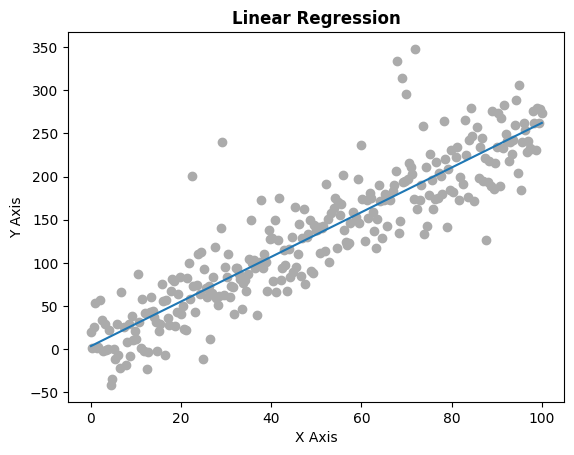

In [18]:
plt.plot(x, y_predicted)
plt.scatter(x, y, c="#ababab")

plt.title('Linear Regression', fontweight='bold')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

### **Conclusion**

In this project, we implemented the **linear regression model** using only `NumPy`, without the use of **machine learning libraries** like `scikit-learn`. Using data from a `csv` file, we were able to find a **line** fitted to the data, calculate **quality indicators**, and **visualize** the result using a **graph**.

However, the project has some **limitations**, such as the use of **only one independent variable** (simple linear regression) and the assumption that the relationship between the `x` and `y` variables is **linear**, which will **not** always be **true**.